# `CUSTOMER CHURN PREDICTION`

## `Business Understanding`

### `Business Objective:` 

The primary objective of Vodafone Corporation is to reduce customer churn, a prevalent issue across many industries, especially in the telecommunications sector. The ultimate goal is to predict the likelihood of a customer di


### `Key Performance Indicateors (KPIs):`  
for this objective includes the churn rate, customer lifetime value, and customer retention rate.


### `Understanding the Current Situation:` 
Currently, `Vodafone` has access to a wealth of customer data, supplied by the business development unit and the marketing and sales team. This data will be leveraged to build machine learning models capable of predicting customer churn. The current churn rate serves as a benchmark for measuring the effectiveness of the implemented strategies.

### `Data Mining Goals:` 
The aim of data mining in this context is `to develop a classification model that can predict whether a customer is likely to churn`. This is a supervised learning problem where the model will be trained on the provided data and then used to make predictions on new data. The model should also be able to identify the key features or indicators that lead to customer churn. The accuracy, precision, recall, and F1 score of the model can serve as KPIs for this goal.

### `Project Plan:` 
The project plan involves several steps. First, the data will be prepared for analysis, which  includes `cleaning the data, handling missing values, and encoding  variables`. Next, appropriate machine learning algorithms will be selected for model construction. The model will then be trained and tested using the prepared data. The model’s performance will be evaluated using suitable metrics, such as `accuracy, recall, precision, and F1 score`. Finally, the model will be deployed for predicting customer churn. The key indicators identified by the model can then be used to devise effective strategies for customer retention. The impact of these strategies can be measured using KPIs such as the `reduction in churn rate and increase in customer retention rate`.

By aligning these steps with the overall business strategy, the company can ensure a data-driven approach to tackling customer churn, ultimately leading to improved customer retention and business growth.

### `Data for the Project:`

The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model while the last data set is for testing the model. The first 3000 records of the dataset can be found in a database which will have to be accessed remotely. The second part of the data is hosted on this GitHub Repository in a file called LP2_Telco-churn-second-2000.csv. Whiles the final data set needed for this project can be found in OneDrive.



### `Target:`

`Churn` — Whether the customer churned or not (Yes, No)

### `Numeric Features:`

+ `Tenure` — Number of months the customer has been with the company
+ `MonthlyCharges` — The monthly amount charged to the customer
+ `TotalCharges` — The total amount charged to the customer


### `Categorical Features:`

+ `CustomerID`
+ `Gender` — M/F
+ `SeniorCitizen` — Whether the customer is a senior citizen or not (1, 0)
+ `Partner` — Whether customer has a partner or not (Yes, No)
+ `Dependents` — Whether customer has dependents or not (Yes, No)
+ `PhoneService` — Whether the customer has a phone service or not (Yes, No)
+ `MulitpleLines` — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
+ `InternetService` — Customer’s internet service type (DSL, Fiber Optic, None)
+ `OnlineSecurity` — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
+ `OnlineBackup` — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
+ `DeviceProtection` — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
+ `TechSupport` — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
+ `StreamingTV` — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
+ `StreamingMovies` — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
+ `Contract` — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
+ `PaperlessBilling` — Whether the customer has paperless billing or not (Yes, No)
+ `PaymentMethod` — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))



### `Analytical Questions`
__Question 1__ : `Churn Rate Over Time`: How does the churn rate vary over different time periods (e.g., months or years)? Are there any seasonal trends in churn rate?

**Question 2** : `Churn Rate by Contract Type`: What is the churn rate for different contract types (e.g., monthly, yearly, or bi-yearly)? Visualize the churn rate distribution among different contract types.

**Question 3**: `Distribution of Monthly Charges`: What is the distribution of monthly charges among customers who churned versus those who did not churn? Are there any significant differences in the distribution?

**Question 4**: `Customer Tenure vs. Churn Rate`: How does the tenure of customers relate to the churn rate? Plot the churn rate against the tenure of customers.

**Question 5**: `Impact of Additional Services`: Visualize the churn rate for customers who have additional services like Online Security, Online Backup, etc. How do these services affect customer retention?

**Question 6**: `Churn Rate by Payment Method`: Is there any correlation between the payment method chosen by customers and their likelihood to churn? Visualize the churn rate for different payment methods.

**Question 7**: `Gender and Churn Rate`: Explore if there's any significant difference in churn rate based on gender. Visualize the churn rate distribution for male and female customers.

**Question 8**: `Customer Demographics and Churn`: Investigate if senior citizens, customers with partners, or customers with dependents are more likely to churn. Visualize the churn rate for these demographics.

**Question 9**: `Correlation Matrix`:Is there any correlation between these numeric features and the target variable, churn?

**Question 10**: What are the most common payment methods?

**Question 11**: What types of contracts are most common among customers?

## `Data Understanding`

In [1]:
#import all necessary libraries

# data manipulation tools
import pandas as pd
import numpy as np
import missingno as msno

# data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistics librabry  
from scipy import stats
from scipy.stats import randint,uniform, mannwhitneyu
import statistics as  stat

# database connections
import pyodbc
from dotenv import load_dotenv,dotenv_values

# data preprocessing packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, RobustScaler,FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import phik
from phik import phik_matrix

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# metrics packages
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV
# roc curve
# smote for balancing
# feature importance

# saving machine learning models
import joblib


# hide warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)



### `Importing Data`

#### Load first training dataset from MS SQL server DB

In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('../.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("ServerName")
database = environment_variables.get("DB_Name")
username = environment_variables.get("DB_User")
password = environment_variables.get("DB_PWD")

In [3]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [4]:
# Connect to the database
connection = pyodbc.connect(connection_string)

In [5]:
# select data from from table
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

df = pd.read_sql(query, connection)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
# exporting imported data to CSV

df.to_csv('../datasets/raw_datasets/first.csv', index=False)

#### Loading second training datasets from Github source

In [7]:
# Load from GitHub repository source

# URL of the raw csv file in the GitHub repository
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/main/LP2_Telco-churn-second-2000.csv'

# Use pandas to load the csv file
df_2 = pd.read_csv(url)

In [8]:
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [9]:
# exporting imported data to CSV

df_2.to_csv('../datasets/raw_datasets/second.csv', index=False)

#### load test datasets in from a Onedrive Repository
The file is an excel file that was downloaded and saved in the test folder of the datasets direcotor


In [10]:

# Use pandas to load the Excel file
df_test = pd.read_excel('../datasets/test_dataset/Telco-churn-last-2000.xlsx')
df_test.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [11]:
# exporting imported data to CSV

df_test.to_csv('../datasets/test_dataset/df_test.csv', index=False)

## `Exploratory Data Analysis(EDA) On Trainind Datasets`



### Load, compare and Merge Dataframes

Before performing this, there is a need to merge the training datasets. before this is done, we have to check if columns are the same. we will start by importing the datasets and then compare them

In [12]:
#load the first training dataset from csv

df1= pd.read_csv('../datasets/raw_datasets/first.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [14]:
#load the second training dataset from csv

df2= pd.read_csv('../datasets/raw_datasets/second.csv')
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [16]:
# Check if the column names of df1 and df2 are the same
if set(df1.columns) == set(df2.columns):
    print("Both DataFrames have the same columns.")
else:
    print("The column names of the DataFrames are different.")


Both DataFrames have the same columns.


In [17]:
#merging the dataframes
# Concatenate the DataFrames along axis=0 (along rows)
concatenated_df = pd.concat([df, df2])

# Display the concatenated DataFrame
concatenated_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

we keep a copy of the merged dataframe so that we can always refer to it instead of starting from the top

In [18]:
#export merged data to csv

concatenated_df.to_csv('../datasets/raw_datasets/merged_df.csv', index= False)

### Beginning the EDA

In [19]:
#load and read merged data

df=pd.read_csv('../datasets/raw_datasets/merged_df.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [20]:
#readin the last 5 rows of the dataframe
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
5042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [21]:
#reading the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


the data above looks fine except for the `TotalCharges` which is object instead of a float datatype. this will be handled during data preprocessing 

#### checking for number of Unique Values in each Column


In [22]:
df.nunique()

customerID          5043
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2069
TotalCharges        4870
Churn                  4
dtype: int64

#### Check for Duplication

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Length: 5043, dtype: bool

In [24]:
df.duplicated().sum()

0

#### Check for Missing Values

In [25]:
#checking the number of missing values
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [26]:
#checking the percentage of missing values
missing_data= (df.isnull().sum()/(len(df)))*100
missing_data

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.334127
InternetService      0.000000
OnlineSecurity      12.908983
OnlineBackup        12.908983
DeviceProtection    12.908983
TechSupport         12.908983
StreamingTV         12.908983
StreamingMovies     12.908983
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.099147
Churn                0.019829
dtype: float64

the maximum percentage of missing data is less than 15% which is okay for imputation

<Axes: >

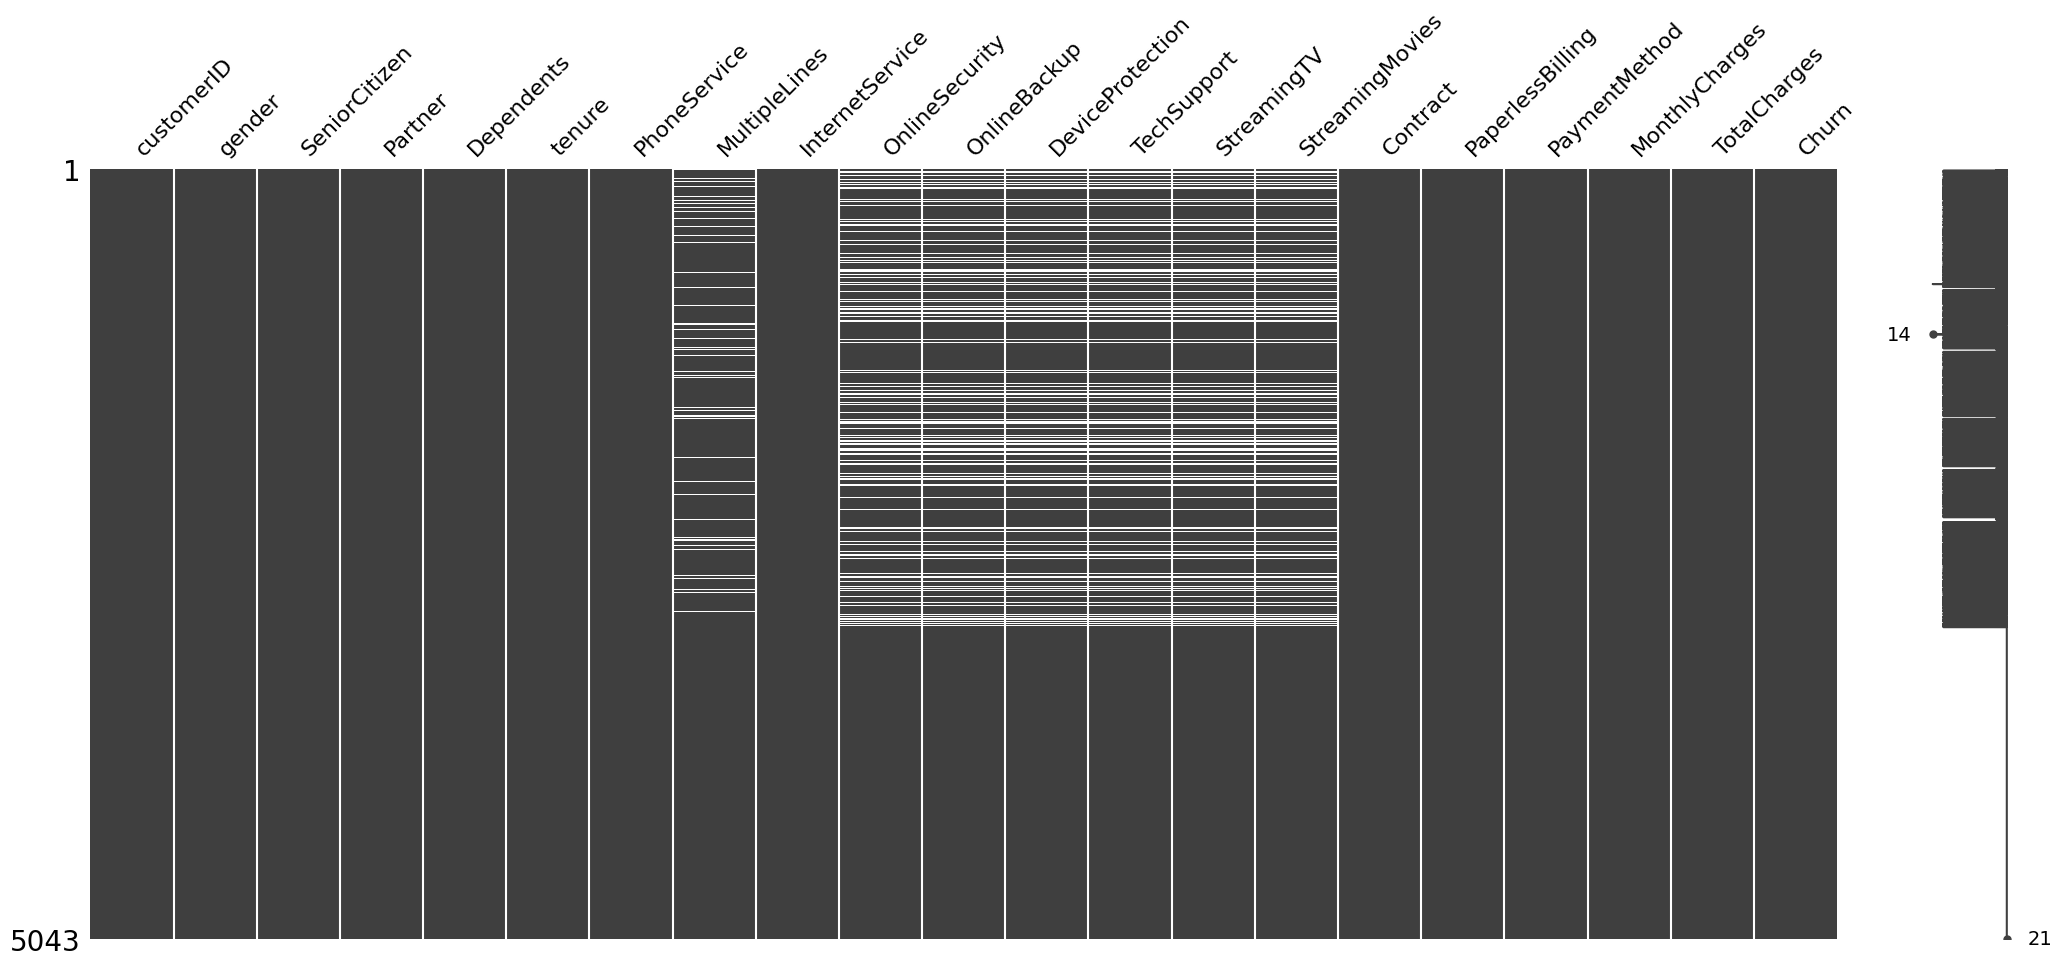

In [27]:
#visualising severity of null values in dataset
msno.matrix(df)

### `Data Reduction`
here we drop columns that may not have a good predicting power. A good clue is a categorical coulumn with unique values for all entries

In [28]:
#dropping  the customerId column
df=df.drop(['customerID'], axis =1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,True,False,1,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,Male,0,False,False,45,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [30]:
# Convert column to numeric with errors='coerce
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


#### Data Wrangling

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [32]:
# Selecting 'tenure', 'MonthlyCharges', and 'TotalCharges' columns
selected_columns = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
selected_columns.head(30)

,tenure,MonthlyCharges,TotalCharges
0,1,29.850000,29.850000
1,34,56.950001,1889.500000
2,2,53.849998,108.150002
3,45,42.299999,1840.750000
4,2,70.699997,151.649994
5,8,99.650002,820.500000
6,22,89.099998,1949.400024
7,10,29.750000,301.899994
8,28,104.800003,3046.050049
9,62,56.150002,3487.949951


checking to see if the data in all columns are in conformity

In [33]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [34]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [35]:
df['Partner'].unique()

array(['True', 'False', 'No', 'Yes'], dtype=object)

there is a non conformity here, so we convert all True and False to Yes and No respectively using the function below

In [36]:
# Define the replacement mapping with boolean values and None as strings
replacement_mapping = {
    'MultipleLines': {'True': 'Yes', 'False': 'No', 'None': 'No phone service'},
    'OnlineSecurity': {'True': 'Yes', 'False': 'No', 'None': 'No internet service'},
    'OnlineBackup': {'True': 'Yes', 'False': 'No', 'None': 'No internet service'},
    'DeviceProtection': {'True': 'Yes', 'False': 'No', 'None': 'No internet service'},
    'TechSupport': {'True': 'Yes', 'False': 'No', 'None': 'No internet service'},
    'StreamingTV': {'True': 'Yes', 'False': 'No', 'None': 'No internet service'},
    'StreamingMovies': {'True': 'Yes', 'False': 'No', 'None': 'No internet service'},
    'Churn': {'True': 'Yes', 'False': 'No', 'None': 'No'},
    'Partner': {'True': 'Yes', 'False': 'No'},
    'Dependents': {'True': 'Yes', 'False': 'No'},
    'PaperlessBilling': {'True': 'Yes', 'False': 'No'},
    'PhoneService': {'True': 'Yes', 'False': 'No'}
}

# Iterate over each column in the replacement mapping
for column, mapping in replacement_mapping.items():
    # Apply the replacement mapping to the column
    df[column] = df[column].replace(mapping)





In [37]:
# Columns for which you want to check unique values
columns_to_check = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Churn',
    'Partner',
    'Dependents',
    'PaperlessBilling',
    'PhoneService'
]

# Iterate over each column
for column in columns_to_check:
    # Print the unique values of the column
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print()  # Add a blank line for readability


Unique values in column 'MultipleLines':
[nan 'No' 'Yes' 'No phone service']

Unique values in column 'OnlineSecurity':
['No' 'Yes' nan 'No internet service']

Unique values in column 'OnlineBackup':
['Yes' 'No' nan 'No internet service']

Unique values in column 'DeviceProtection':
['No' 'Yes' nan 'No internet service']

Unique values in column 'TechSupport':
['No' 'Yes' nan 'No internet service']

Unique values in column 'StreamingTV':
['No' 'Yes' nan 'No internet service']

Unique values in column 'StreamingMovies':
['No' 'Yes' nan 'No internet service']

Unique values in column 'Churn':
['No' 'Yes' nan]

Unique values in column 'Partner':
['Yes' 'No']

Unique values in column 'Dependents':
['No' 'Yes']

Unique values in column 'PaperlessBilling':
['Yes' 'No']

Unique values in column 'PhoneService':
['No' 'Yes']



In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [39]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


#### Insights
This is a summary of descriptive statistics for a dataset with four columns: `SeniorCitizen`, `tenure`, `MonthlyCharges`, and `TotalCharges`.

- **count**: This row shows the number of non-missing values for each column. For example, there are 5043 non-missing values for each of the four columns.
  
- **mean**: This row displays the mean (average) value for each column. For instance, the mean value for `SeniorCitizen` is approximately 0.162, for `tenure` is approximately 32.577, for `MonthlyCharges` is approximately 65.090, and for `TotalCharges` is approximately 2297.877.

- **std**: This row represents the standard deviation, which measures the dispersion or spread of the values around the mean. It indicates the variability of the data. For example, the standard deviation for `SeniorCitizen` is approximately 0.369, for `tenure` is approximately 24.530, for `MonthlyCharges` is approximately 30.068, and for `TotalCharges` is approximately 2267.155.

- **min**: This row displays the minimum value observed in each column. For instance, the minimum value for `SeniorCitizen` is 0, for `tenure` is 0, for `MonthlyCharges` is 18.40, and for `TotalCharges` is 0.

- **25%**, **50%**, and **75%**: These rows represent the quartiles of the data distribution. The 25th percentile (25%) indicates the value below which 25% of the data falls, the 50th percentile (50%) represents the median (middle) value of the dataset, and the 75th percentile (75%) indicates the value below which 75% of the data falls. For example, the 25th percentile value for `SeniorCitizen` is 0, for `tenure` is 9, for `MonthlyCharges` is 35.775, and for `TotalCharges` is 411.600.

- **max**: This row displays the maximum value observed in each column. For instance, the maximum value for `SeniorCitizen` is 1, for `tenure` is 72, for `MonthlyCharges` is 118.650, and for `TotalCharges` is 8510.400.

These statistics provide valuable insights into the central tendency, dispersion, and distribution of the data in each column, helping to understand the characteristics of the dataset.

#### Univariate Analysis

In [42]:
#Filling the total charges column
# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'totalcharges' column
imputer.fit(df[['TotalCharges']])

# Transform and replace missing values in the 'totalcharges' column with the median
df['TotalCharges'] = imputer.transform(df[['TotalCharges']])

Histogram of Numeric columns

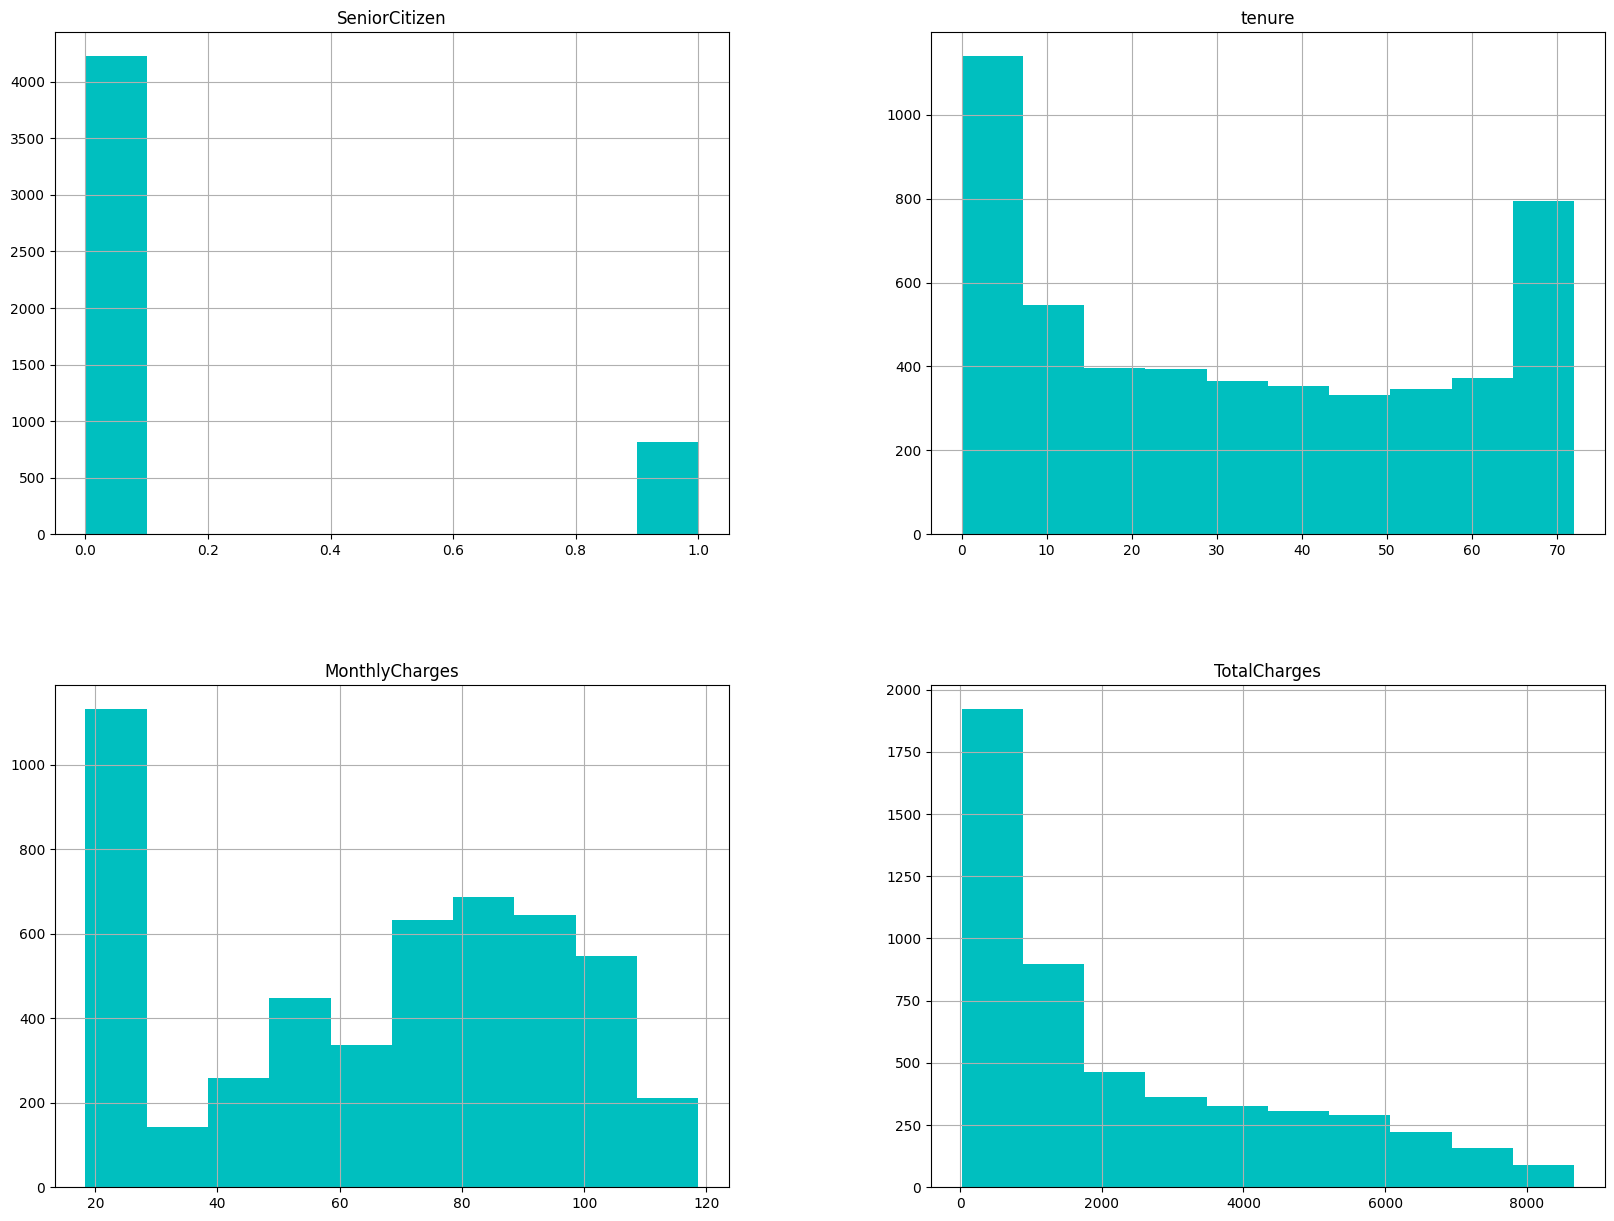

In [43]:
df.hist(figsize=(20, 15), color = 'c')
plt.show()

Density Plot

<Axes: ylabel='Density'>

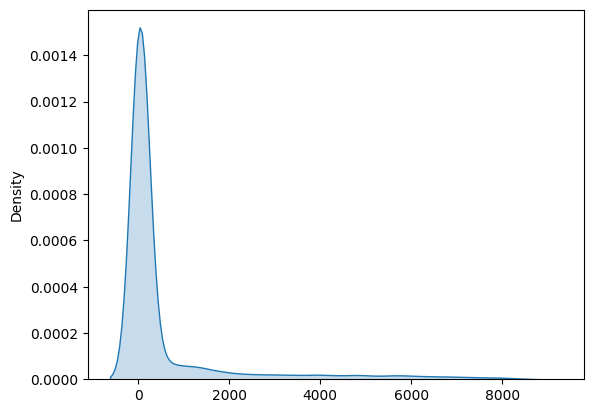

In [44]:
# Extract numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Drop specified columns
columns_to_exclude = ['gender', 'partner', 'dependents', 'phone_service',
                      'multiple_lines', 'internet_service', 'online_security',
                      'online_backup', 'device_protection', 'tech_support',
                      'streaming_tv', 'streaming_movies', 'contract',
                      'paperless_billing', 'payment_method', 'churn']
numerical_columns_filtered = [col for col in numerical_columns if col not in columns_to_exclude]

# Extract numerical values and flatten them
numerical_values = df[numerical_columns_filtered].values.ravel()

# Plot KDE
sns.kdeplot(numerical_values, fill=True)


Therefore, the data does not follow the rule of normal distribution due to its positive skewness.

In [45]:
# Extracting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

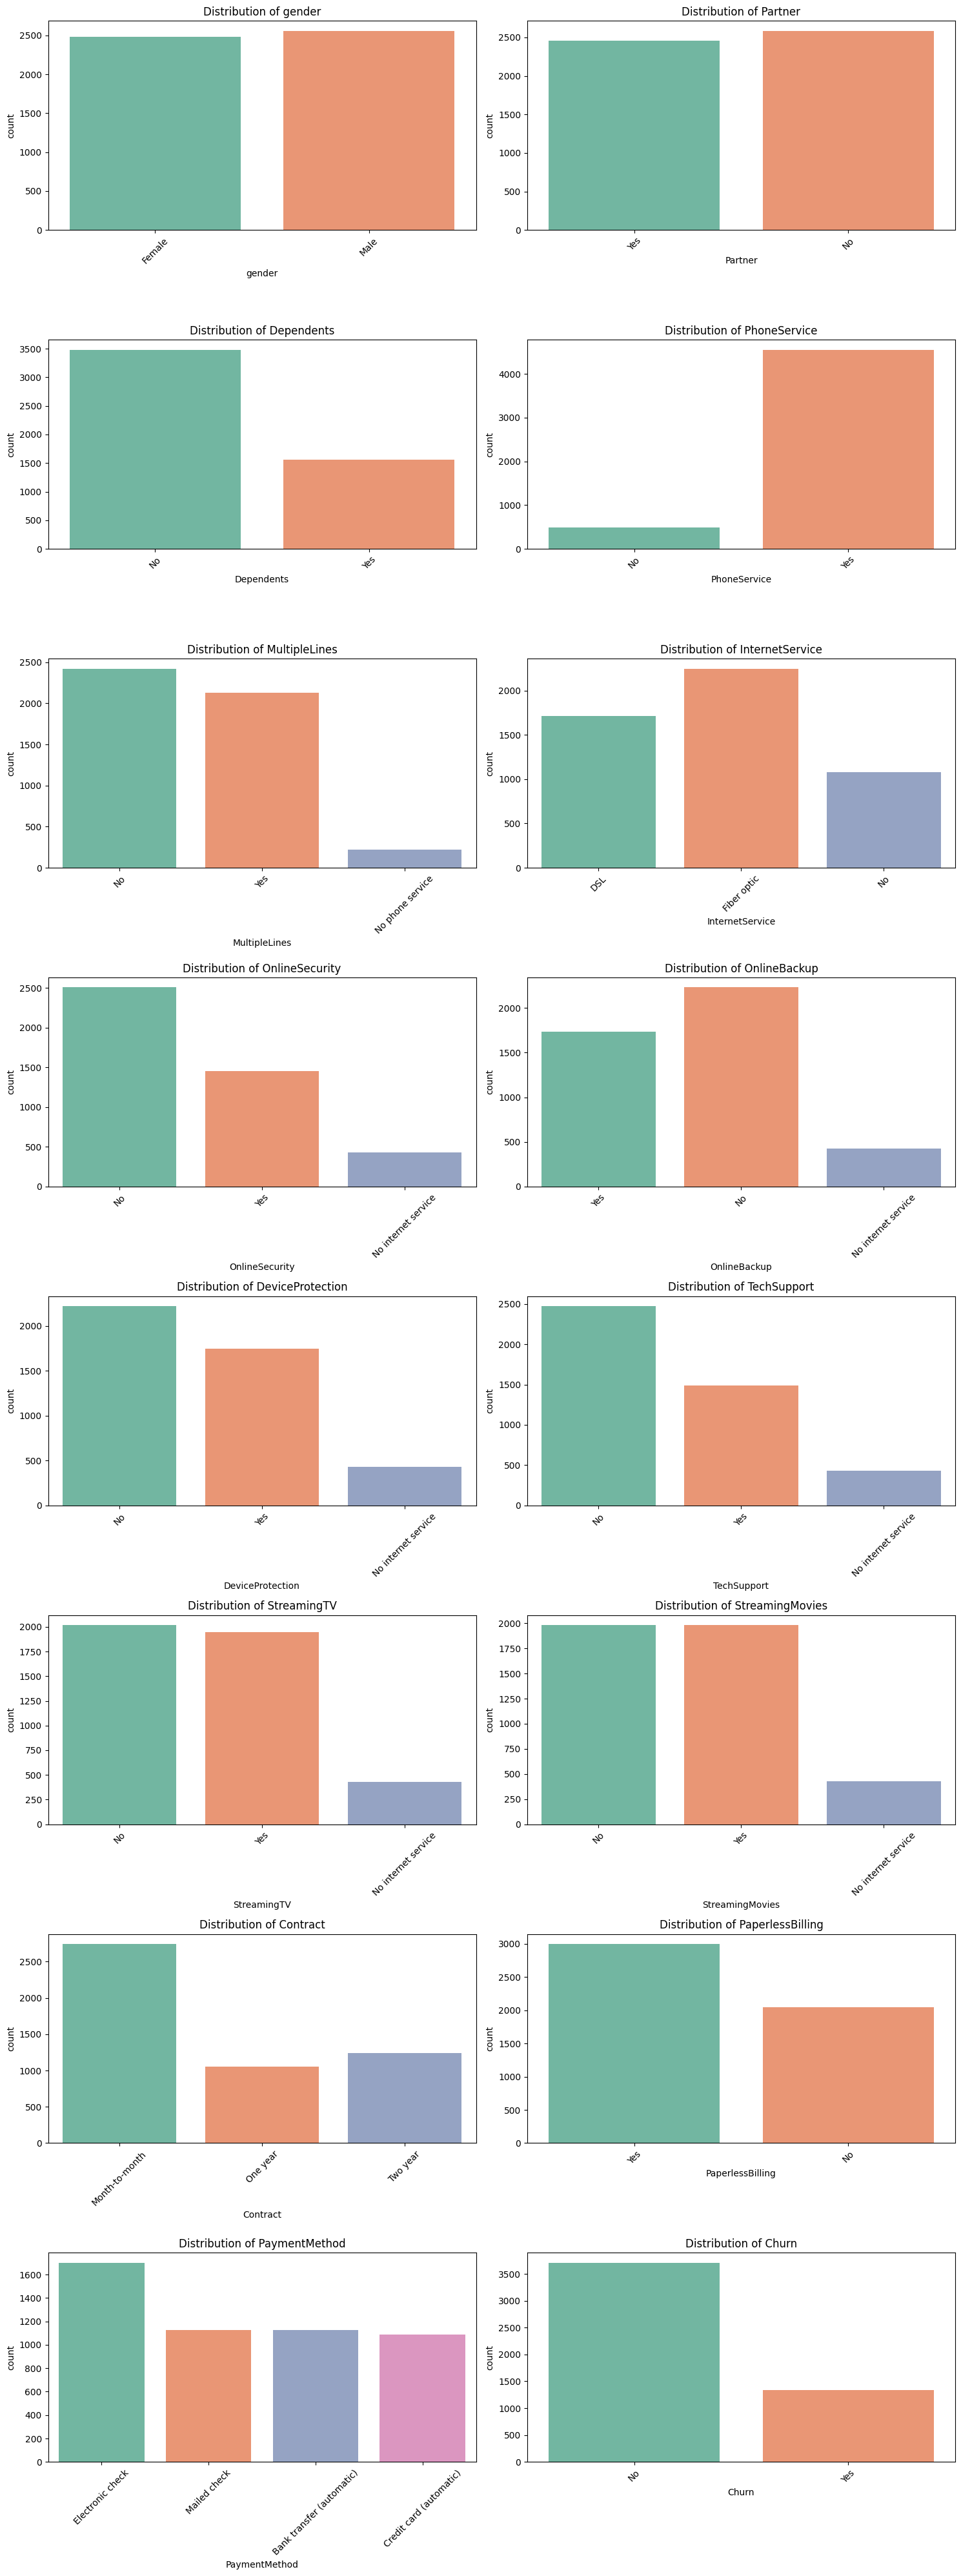

In [46]:


# Calculate the number of rows needed to display all plots
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

# Set the size of each visual
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Loop through categorical columns for visualization
for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(x=column, data=df, palette='Set2', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


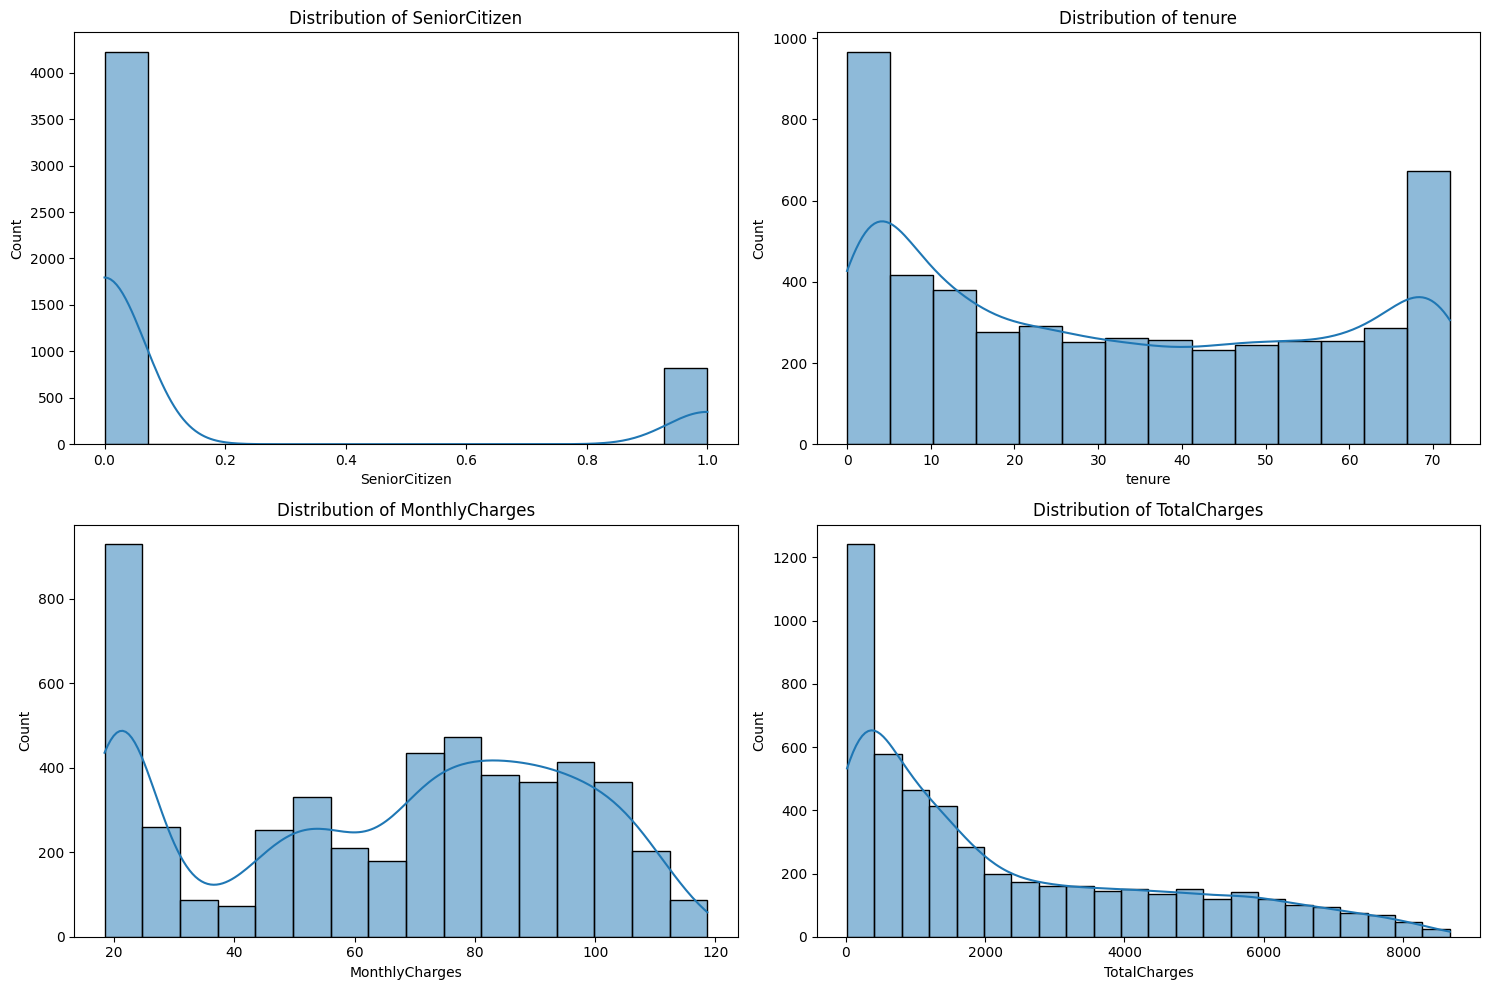

In [47]:
# Extracting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed to display all plots
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Set the size of each visual
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Loop through numerical columns for visualization
for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

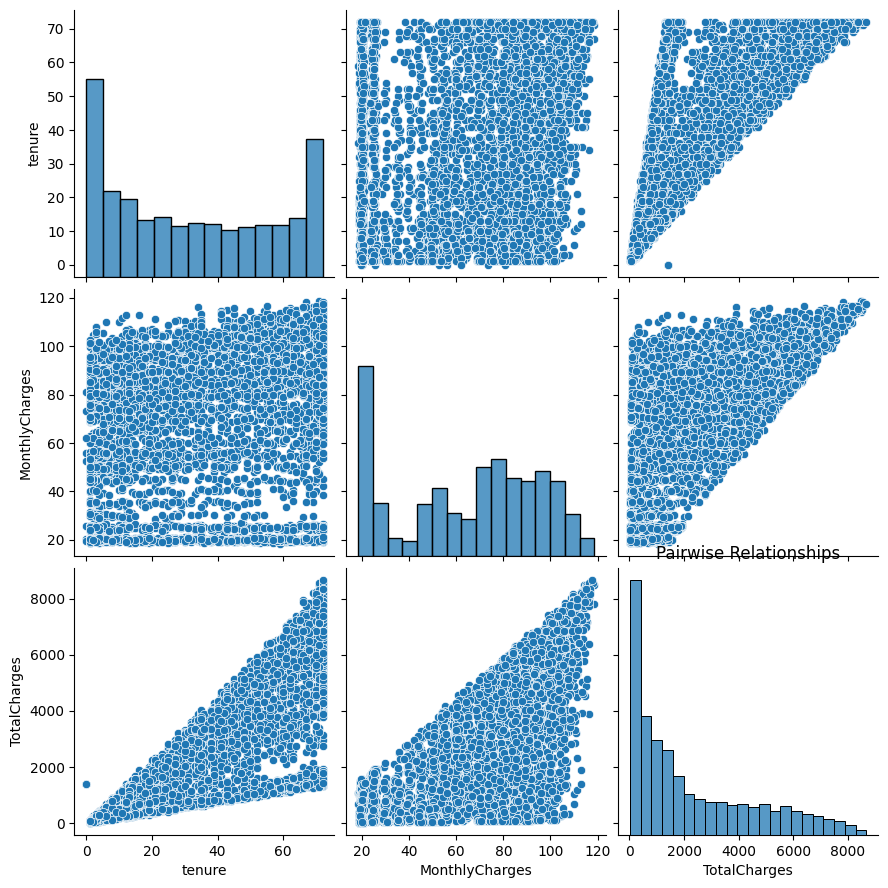

In [48]:
# Pairwise scatter plots
plt.figure(figsize=(15, 10))
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']], height=3)
plt.title('Pairwise Relationships')
plt.show()


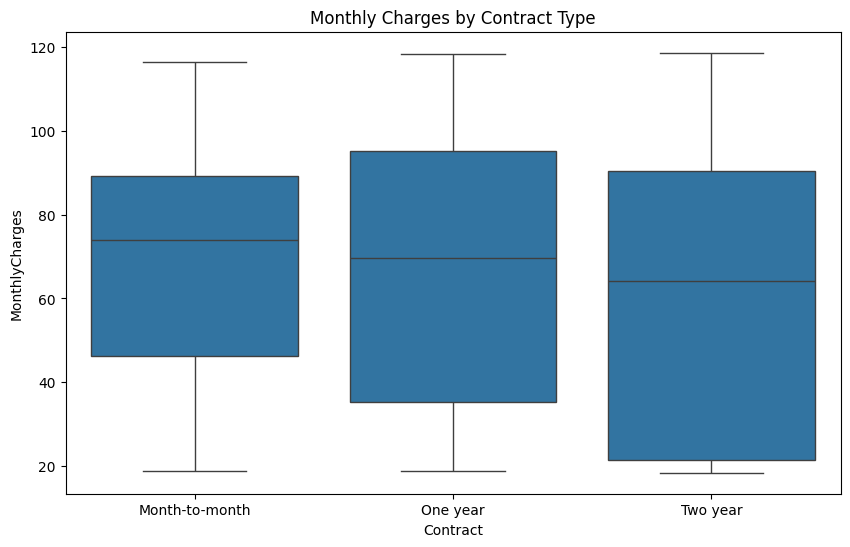

In [49]:
# Box plots for numerical variables against categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')
plt.show()

# Repeat this process for other numerical variables against categorical variables


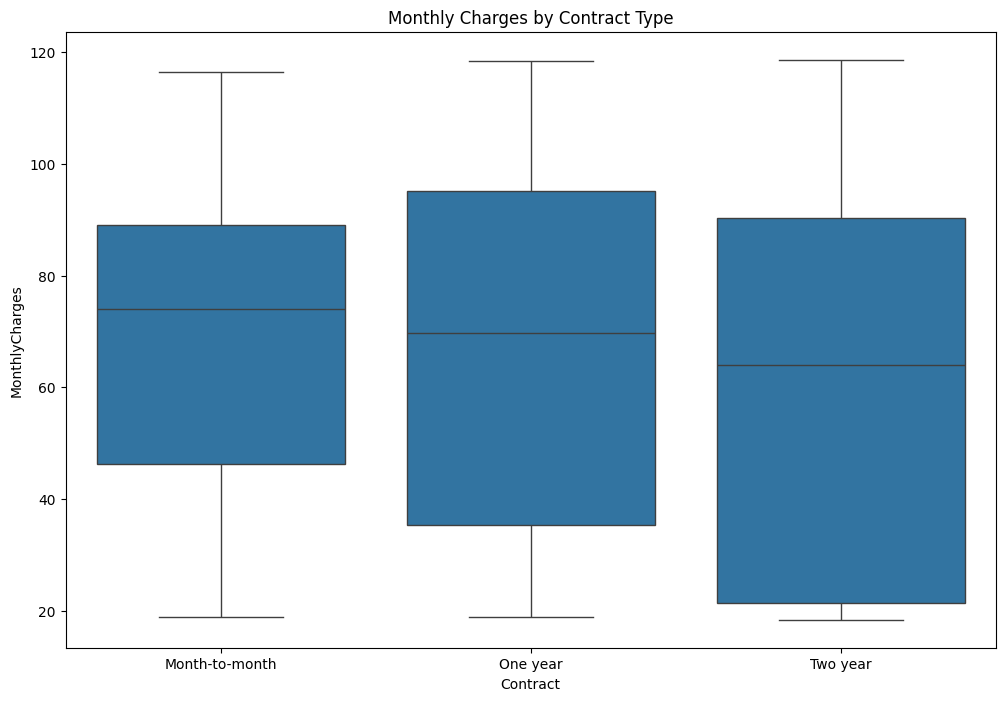

In [50]:
# Box plots for numerical variables against categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')
plt.show()

# Repeat this process for other numerical variables against categorical variables


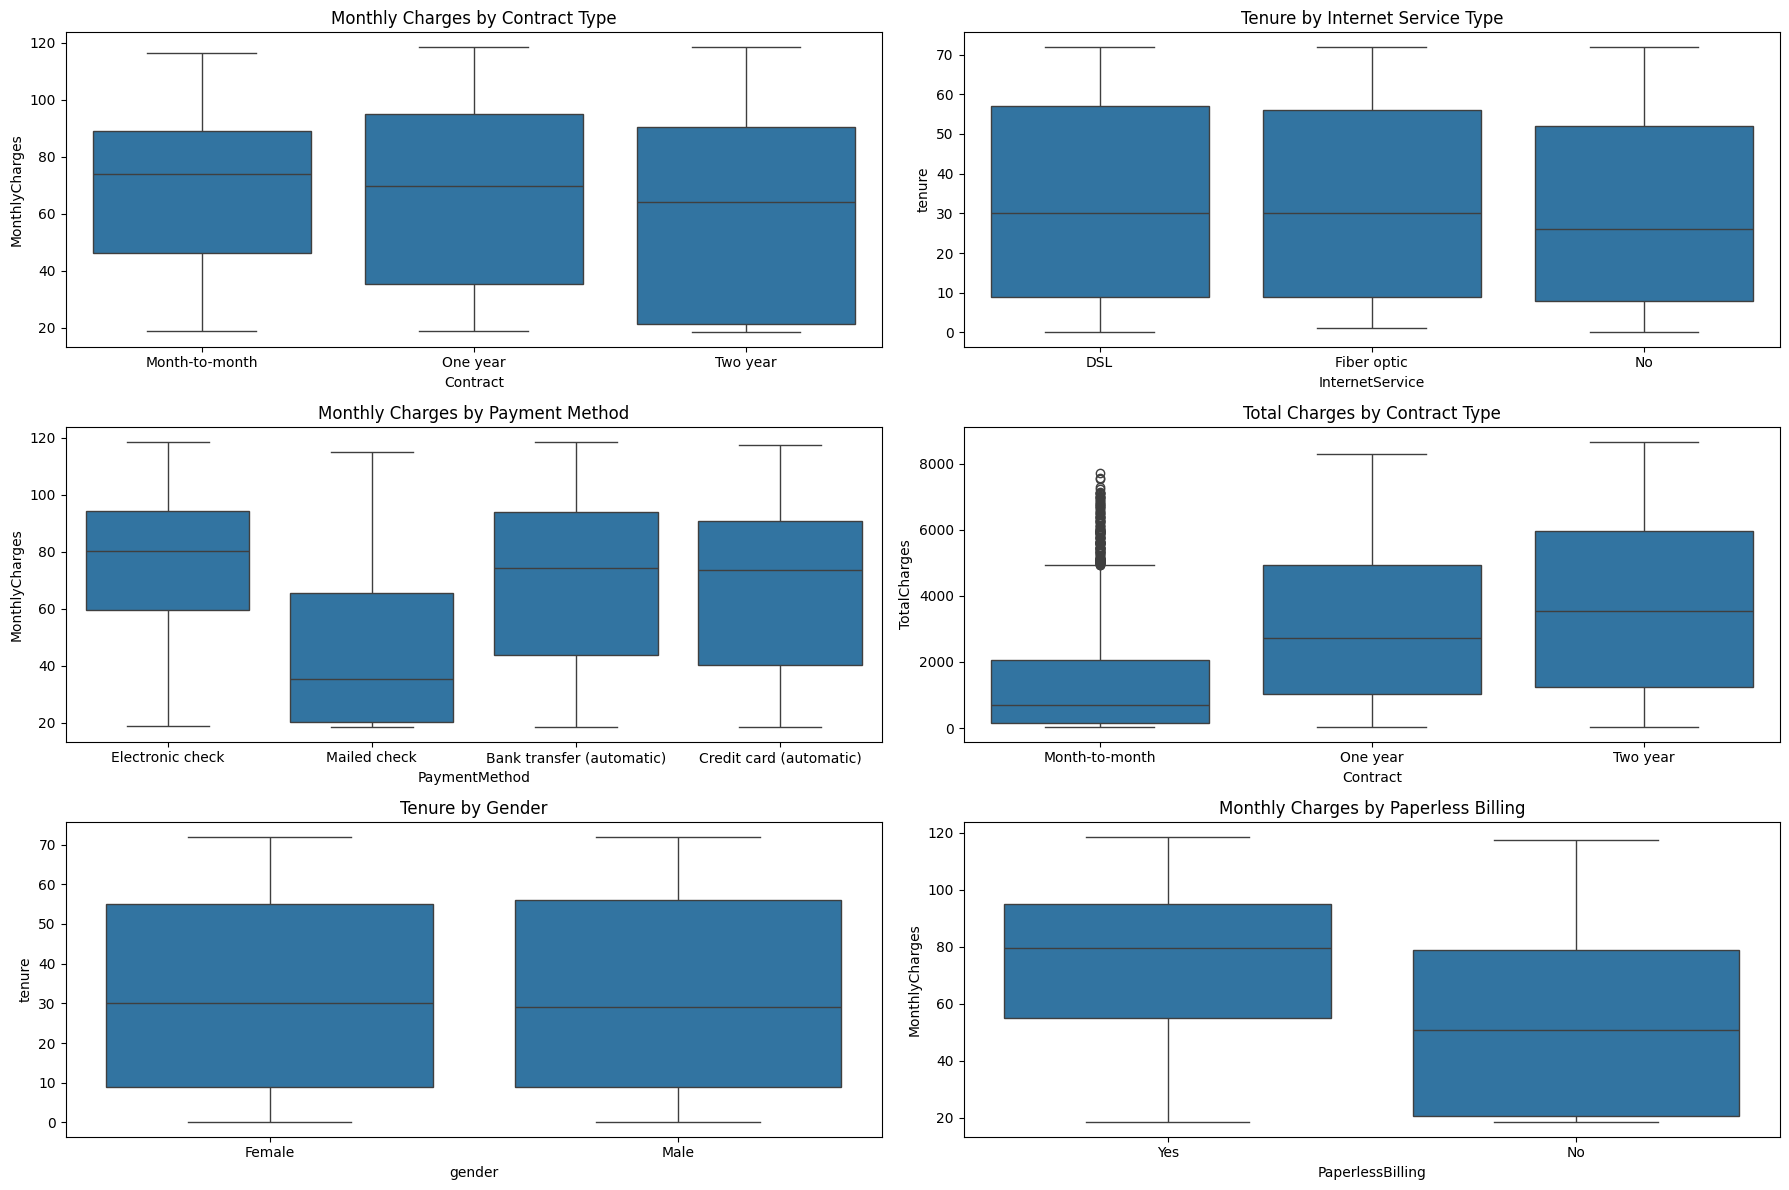

In [51]:
# Box plots for numerical variables against categorical variables

# Plot 1: Monthly Charges by Contract Type
plt.figure(figsize=(18, 12))
plt.subplot(3, 2, 1)
sns.boxplot(x='Contract', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Contract Type')

# Plot 2: Tenure by Internet Service Type
plt.subplot(3, 2, 2)
sns.boxplot(x='InternetService', y='tenure', data=df)
plt.title('Tenure by Internet Service Type')

# Plot 3: Monthly Charges by Payment Method
plt.subplot(3, 2, 3)
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Payment Method')

# Plot 4: Total Charges by Contract Type
plt.subplot(3, 2, 4)
sns.boxplot(x='Contract', y='TotalCharges', data=df)
plt.title('Total Charges by Contract Type')

# Plot 5: Tenure by Gender
plt.subplot(3, 2, 5)
sns.boxplot(x='gender', y='tenure', data=df)
plt.title('Tenure by Gender')

# Plot 6: Monthly Charges by Paperless Billing
plt.subplot(3, 2, 6)
sns.boxplot(x='PaperlessBilling', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Paperless Billing')

plt.tight_layout()
plt.show()


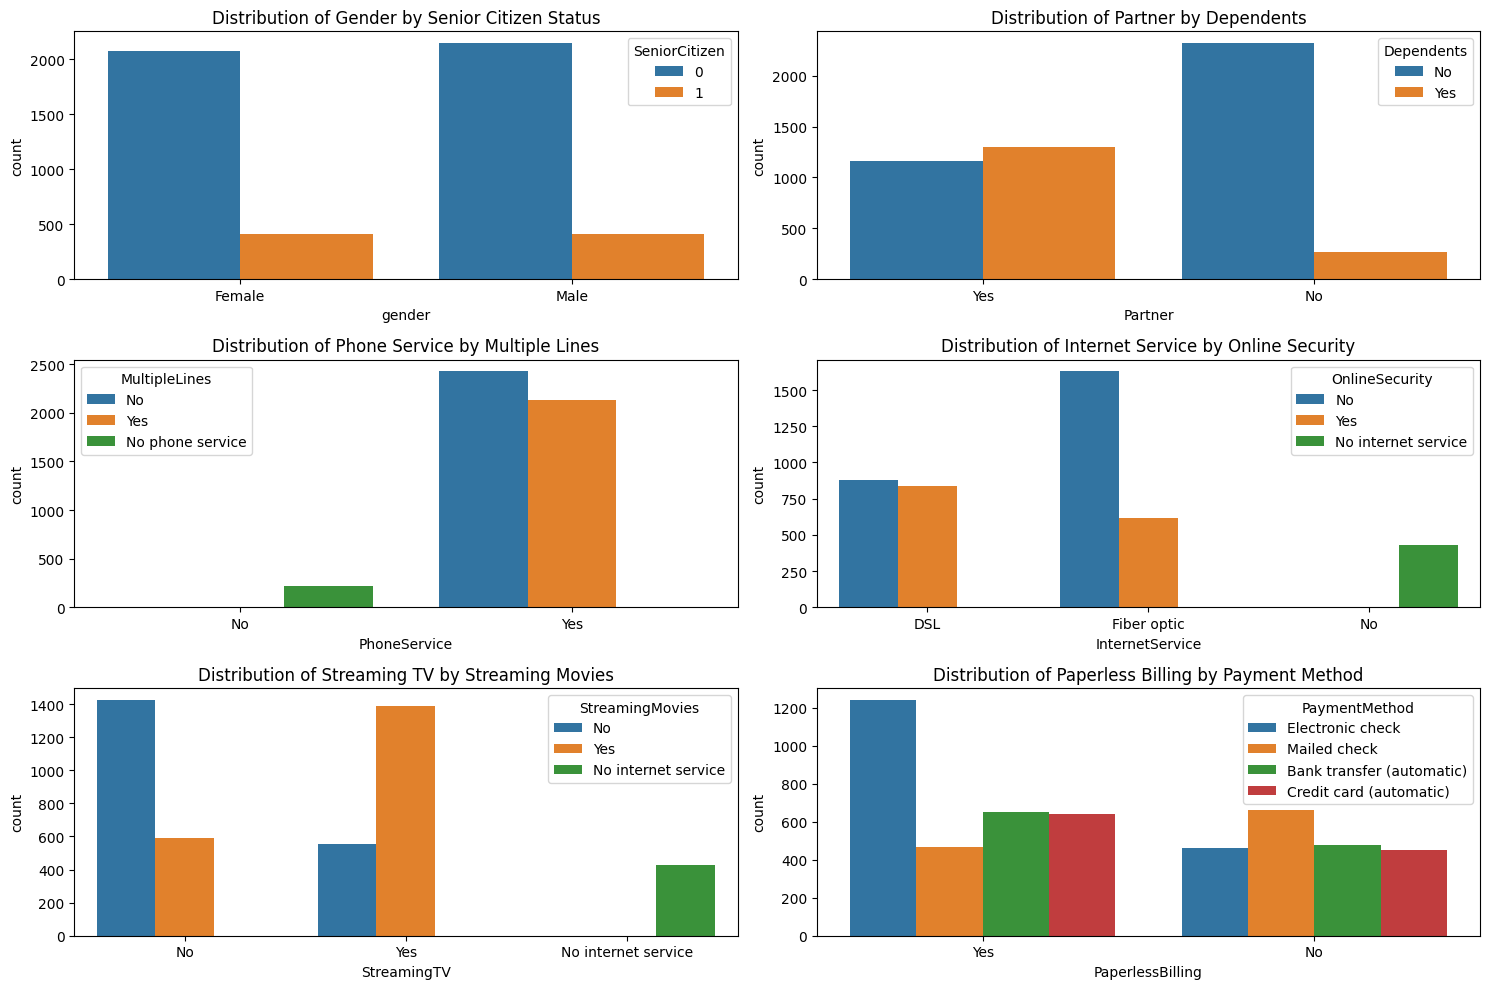

In [52]:
# Stacked bar plots for categorical variables against other categorical variables

# Plot 1: Gender by Senior Citizen Status
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.countplot(x='gender', hue='SeniorCitizen', data=df)
plt.title('Distribution of Gender by Senior Citizen Status')

# Plot 2: Partner by Dependents
plt.subplot(3, 2, 2)
sns.countplot(x='Partner', hue='Dependents', data=df)
plt.title('Distribution of Partner by Dependents')

# Plot 3: Phone Service by Multiple Lines
plt.subplot(3, 2, 3)
sns.countplot(x='PhoneService', hue='MultipleLines', data=df)
plt.title('Distribution of Phone Service by Multiple Lines')

# Plot 4: Internet Service by Online Security
plt.subplot(3, 2, 4)
sns.countplot(x='InternetService', hue='OnlineSecurity', data=df)
plt.title('Distribution of Internet Service by Online Security')

# Plot 5: Streaming TV by Streaming Movies
plt.subplot(3, 2, 5)
sns.countplot(x='StreamingTV', hue='StreamingMovies', data=df)
plt.title('Distribution of Streaming TV by Streaming Movies')

# Plot 6: Paperless Billing by Payment Method
plt.subplot(3, 2, 6)
sns.countplot(x='PaperlessBilling', hue='PaymentMethod', data=df)
plt.title('Distribution of Paperless Billing by Payment Method')

plt.tight_layout()
plt.show()


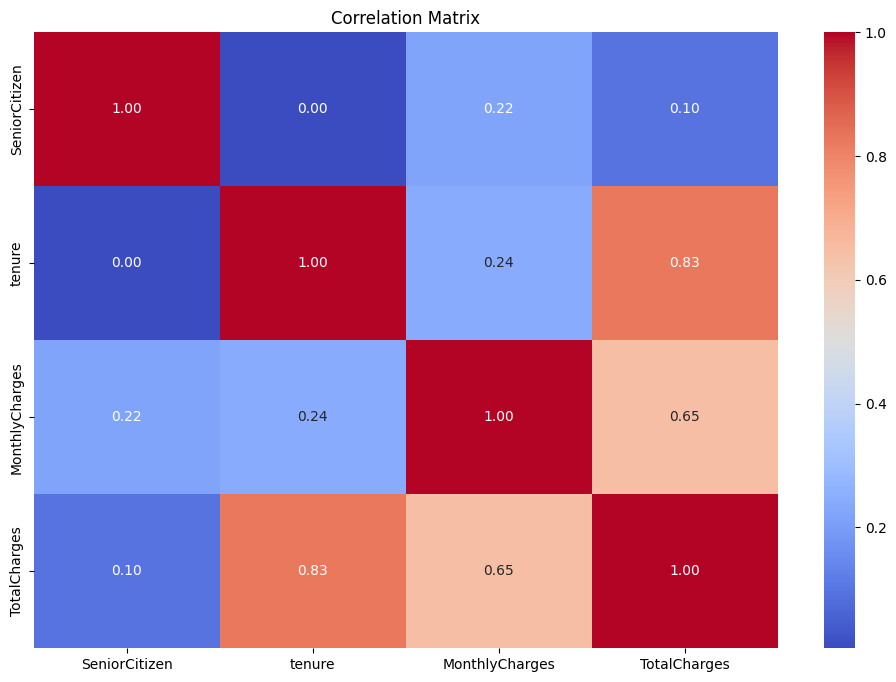

In [53]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [54]:
# Calculate skewness for numerical variables
df[numerical_columns].skew()



SeniorCitizen     1.831228
tenure            0.225132
MonthlyCharges   -0.238767
TotalCharges      0.946284
dtype: float64

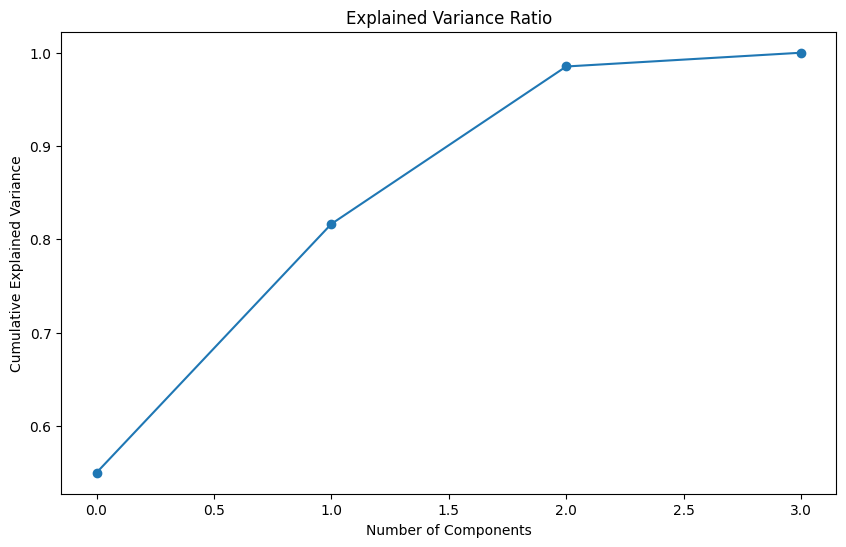

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Extract numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define X as the feature matrix
X = df[numerical_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()


ANALYTICAL QUESTION

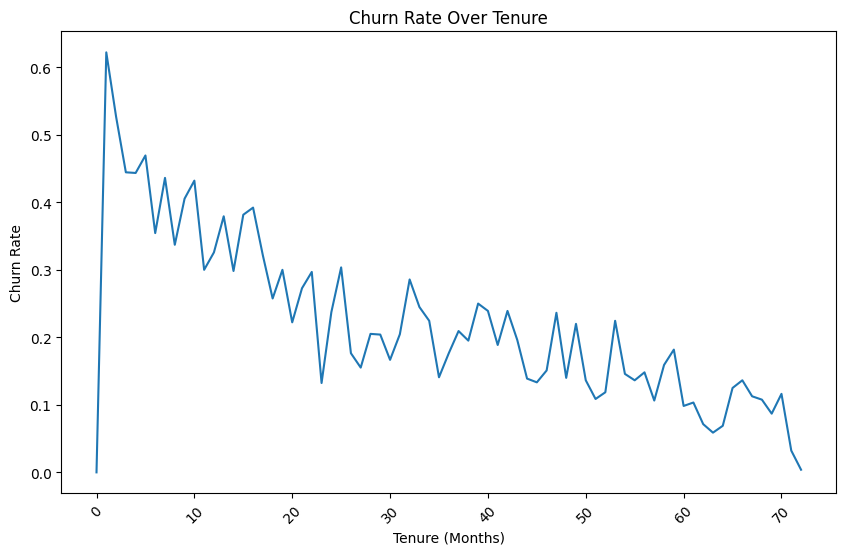

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df with columns 'Churn' and 'tenure'

# Map 'Yes' to 1 and 'No' to 0 in the 'Churn' column
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rate for each tenure
churn_rate_over_tenure = df.groupby('tenure')['Churn'].mean()

# Visualize churn rate over tenure
plt.figure(figsize=(10, 6))
sns.lineplot(data=churn_rate_over_tenure)
plt.title('Churn Rate Over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


`Graph Description`:
The graph illustrates the churn rate (the rate at which customers stop using a service or product) over a period of tenure in months.
It reveals how the churn rate evolves as customers continue their subscription or engagement with a service.

`Graph Components`:

`Initial Decline`: At the start (0 months), the churn rate is high (around 0.6). This indicates that many customers leave early.

`Gradual Decrease`: As tenure increases, the churn rate gradually decreases. This suggests that customer retention improves over time.

`Fluctuations`: Despite the overall decline, there are fluctuations in the churn rate. These might be influenced by various factors (seasonal trends, promotions, etc.).

`Interpretation`:
The graph highlights the importance of customer retention strategies. Early-stage efforts are crucial to reduce initial churn.
As customers become more familiar with the service, they are less likely to churn.
Long-term engagement leads to a more stable and loyal customer base.

Observation

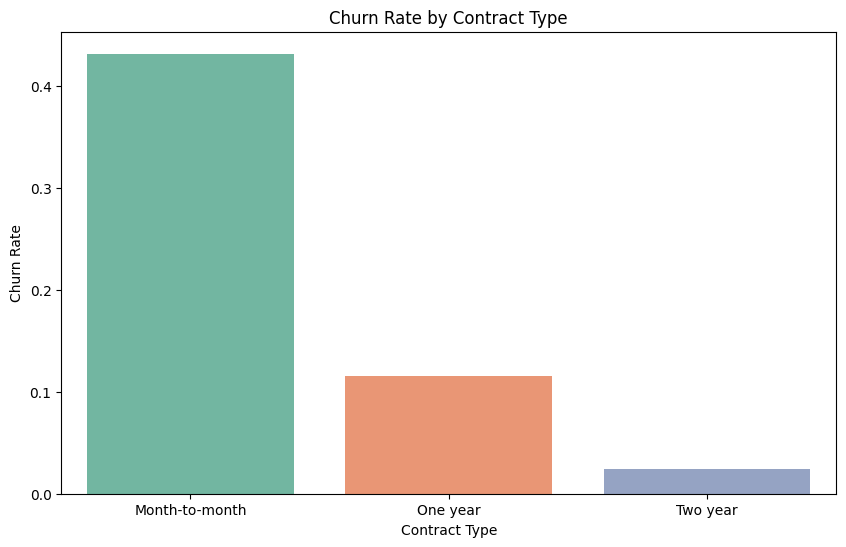

In [57]:
# Calculate churn rate for each contract type
churn_rate_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()

# Visualize churn rate distribution among different contract types
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Churn', data=churn_rate_by_contract, palette='Set2')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


`Graph Description`:

The graph compares the churn rates for three different types of contracts: Month-to-month, One year, and Two year.
Churn rate represents the proportion of customers who discontinue their service or subscription.


`Contract Type Impact`: Month-to-month contracts have the highest churn rate, indicating that customers prefer flexibility but are more likely to leave.

`Long-Term Commitment`: Two-year contracts result in the lowest churn, suggesting that longer commitments foster customer loyalty.

`Retention Strategies`: Businesses should focus on retaining month-to-month customers and incentivizing longer-term contracts.

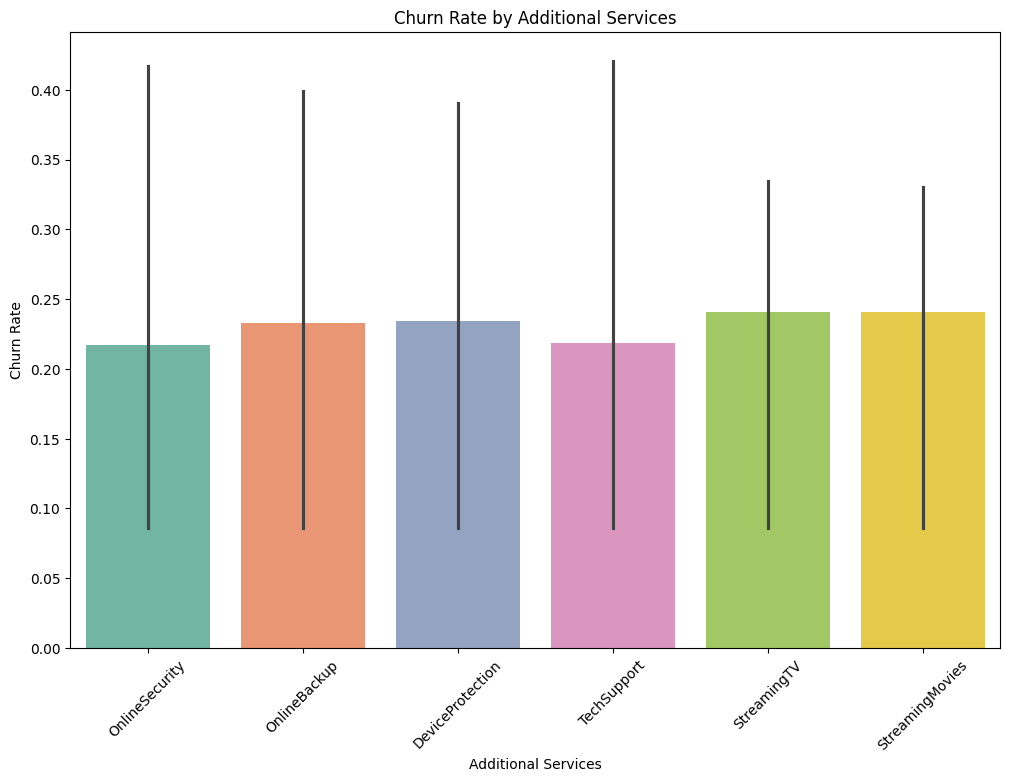

In [58]:
# List of additional services columns
additional_services_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Calculate churn rate for each additional service
churn_rates = {}
for column in additional_services_columns:
    churn_rates[column] = df.groupby(column)['Churn'].mean()

# Convert churn rates to DataFrame for easier plotting
churn_rates_df = pd.DataFrame(churn_rates)

# Plot the churn rate distribution for different additional services
plt.figure(figsize=(12, 8))
sns.barplot(data=churn_rates_df, palette='Set2')
plt.title('Churn Rate by Additional Services')
plt.xlabel('Additional Services')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


`Graph Description`


“Additional Services”, which include: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies all had between churn rates 0.20 and 0.25. The graph also includes error bars on each bar, which represent the variability or uncertainty in the data points.

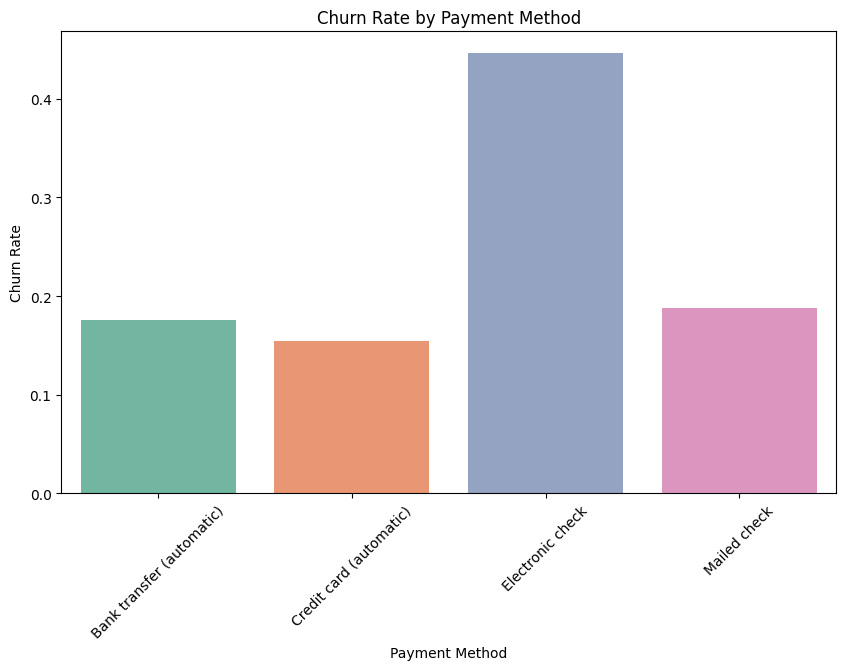

In [59]:
# Calculate churn rate for each payment method
churn_rates = df.groupby('PaymentMethod')['Churn'].mean()

# Plot the churn rate distribution for different payment methods
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='Set2')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


`Graph Description`


in determining whether payment method had any impact on churn rate, it was realised the most significant one was Electronic Check had a higher churn rate. Thus over 40% as compare to the others which range from 18% to 20%

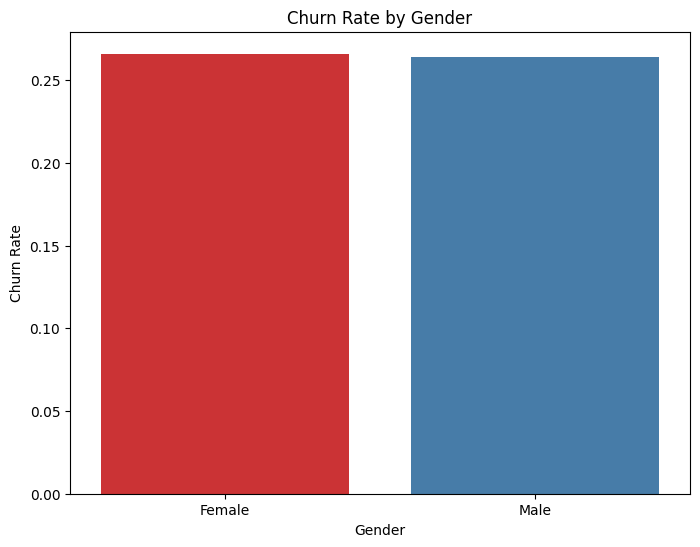

In [60]:
# Calculate churn rate for each gender
churn_rates = df.groupby('gender')['Churn'].mean()

# Plot the churn rate distribution for male and female customers
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='Set1')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()


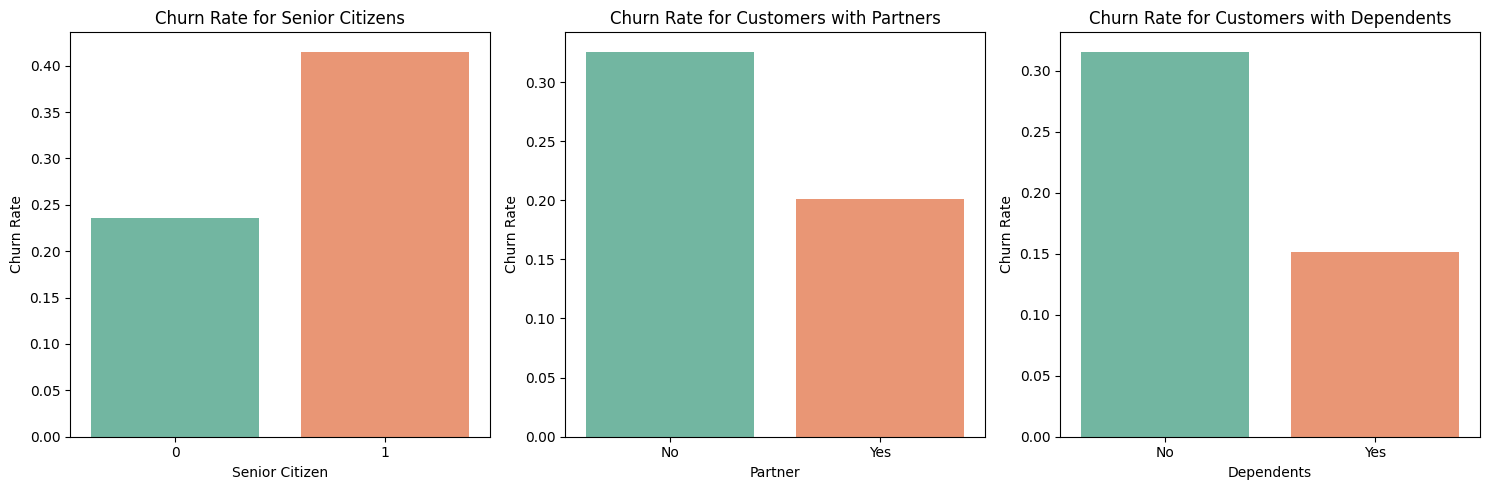

In [61]:
# Calculate churn rate for senior citizens
senior_churn_rate = df.groupby('SeniorCitizen')['Churn'].mean()

# Calculate churn rate for customers with partners
partner_churn_rate = df.groupby('Partner')['Churn'].mean()

# Calculate churn rate for customers with dependents
dependents_churn_rate = df.groupby('Dependents')['Churn'].mean()

# Plot the churn rate distribution for each demographic
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=senior_churn_rate.index, y=senior_churn_rate.values, palette='Set2')
plt.title('Churn Rate for Senior Citizens')
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Rate')

plt.subplot(1, 3, 2)
sns.barplot(x=partner_churn_rate.index, y=partner_churn_rate.values, palette='Set2')
plt.title('Churn Rate for Customers with Partners')
plt.xlabel('Partner')
plt.ylabel('Churn Rate')

plt.subplot(1, 3, 3)
sns.barplot(x=dependents_churn_rate.index, y=dependents_churn_rate.values, palette='Set2')
plt.title('Churn Rate for Customers with Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()


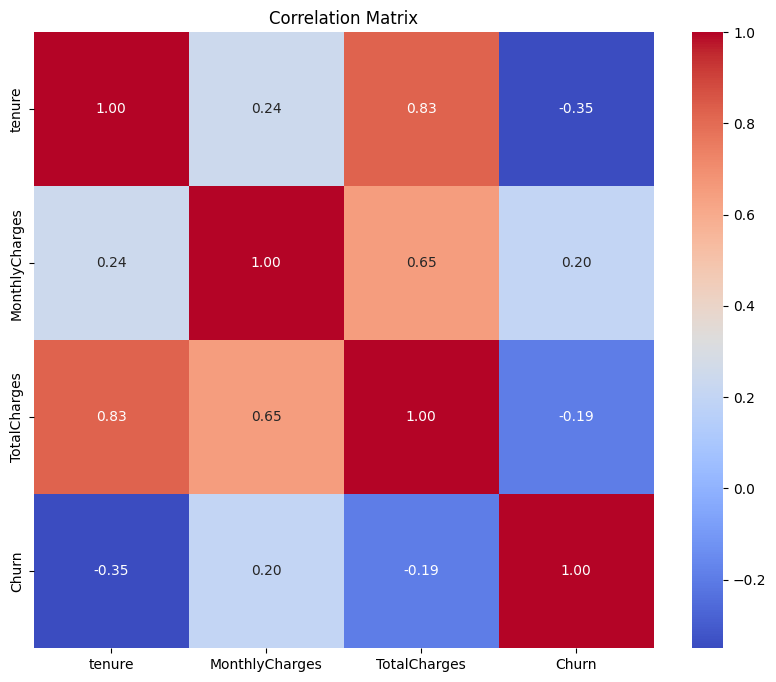

In [62]:
# Select numeric features and target variable
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Create a correlation matrix
correlation_matrix = df[numeric_features].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


tenure and TotalCharges: Strong positive correlation of 0.83
MonthlyCharges and TotalCharges: Moderate positive correlation of 0.65
tenure and Churn: Moderate negative correlation of -0.35

In [63]:
# Convert numeric values back to categorical (Yes/No)
df['Churn'] = df['Churn'].map({1: 'Yes', 0: 'No'})


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [65]:
# Save DataFrame to a CSV file
df.to_csv('../datasets/raw_datasets/df.csv', index=False)


In [66]:
# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'totalcharges' column
imputer.fit(df[['TotalCharges']])

# Transform and replace missing values in the 'totalcharges' column with the median
df['TotalCharges'] = imputer.transform(df[['TotalCharges']])


### Data Preparation

- #### Check Balance of Target Class

In [67]:
#call datasets to be used
df = pd.read_csv('../datasets/raw_datasets/df.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [68]:
class_disTarg = df['Churn'].value_counts().rename('Total').reset_index()
class_disTarg

,Churn,Total
0,No,3706
1,Yes,1336


In [69]:
class_disTarg['Ratio'] = class_disTarg['Total'].apply(lambda x: round((x/class_disTarg['Total'].sum()*100), 2))
class_disTarg

,Churn,Total,Ratio
0,No,3706,73.5
1,Yes,1336,26.5


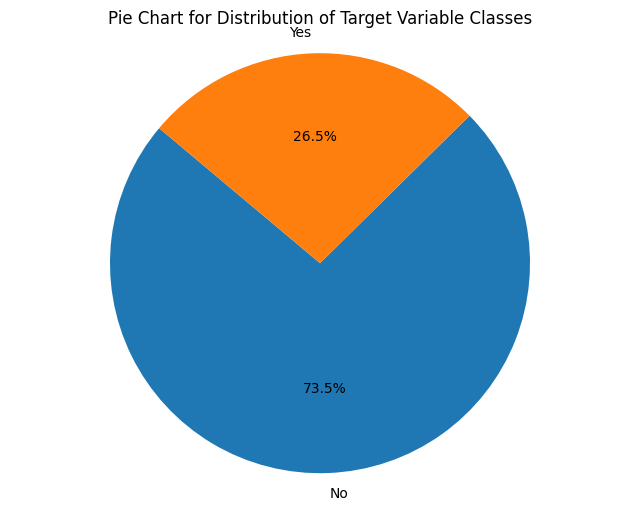

In [70]:
#plotting the ration

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_disTarg['Ratio'], labels=class_disTarg.Churn, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Pie Chart for Distribution of Target Variable Classes')
plt.show()

* Visually , it is seen the data is imbalanced


#### split data into Training and Evaluation

* X= input_data
* y= label

In [80]:
# Relevant Feature Variables
X = df[['tenure', 'PaymentMethod', 'MonthlyCharges', 'Contract', 'PaperlessBilling', 'Dependents']]



# target variable
y = df["Churn"]

In [72]:
y=df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5038     No
5039     No
5040     No
5041    Yes
5042     No
Name: Churn, Length: 5043, dtype: object

### Splitting data for training and testing

In [82]:


# Create an instance of SimpleImputer with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fill NaN values in the original DataFrame X with the mode
X_filled = imputer.fit_transform(X)


In [85]:
columns_with_nan = X.columns[X.isna().any()].tolist()
print("Columns containing NaN values:", columns_with_nan)



Columns containing NaN values: []


In [88]:
columns_with_nan = X.columns[X.isnull().any()].tolist()
print("Columns containing NaN values:", columns_with_nan)

Columns containing NaN values: []


In [89]:
for column in X.columns:
    unique_values = X[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in column 'MonthlyCharges': [ 29.85000038  56.95000076  53.84999847 ...  78.7         60.65
 103.2       ]
Unique values in column 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in column 'PaperlessBilling': ['Yes' 'No']
Unique values in column 'Dependents': ['No' 'Yes']


In [90]:
if y.isnull().any():
    print("Target variable 'y' contains missing values.")
else:
    print("Target variable 'y' does not contain missing values.")


Target variable 'y' contains missing values.


In [92]:
# Calculate the percentage of missing values in each column
missing_percentage = y.isnull().mean() * 100

# Display the percentage of missing values for each column
print(missing_percentage)


0.019829466587348802


In [93]:
# Find the indices of rows with missing values in y
missing_y_indices = y.isnull()

# Remove rows with missing values from X and y
X_cleaned = X[~missing_y_indices]
y_cleaned = y[~missing_y_indices]


In [95]:
X


,tenure,PaymentMethod,MonthlyCharges,Contract,PaperlessBilling,Dependents
0,1,Electronic check,29.850000,Month-to-month,Yes,No
1,34,Mailed check,56.950001,One year,No,No
2,2,Mailed check,53.849998,Month-to-month,Yes,No
3,45,Bank transfer (automatic),42.299999,One year,No,No
4,2,Electronic check,70.699997,Month-to-month,Yes,No
...,...,...,...,...,...,...
5038,24,Mailed check,84.800000,One year,Yes,Yes
5039,72,Credit card (automatic),103.200000,One year,Yes,Yes
5040,11,Electronic check,29.600000,Month-to-month,Yes,Yes
5041,4,Mailed check,74.400000,Month-to-month,Yes,No


In [96]:
from sklearn.model_selection import StratifiedKFold

# Define the number of folds
n_splits = 5  # You can change this number according to your preference

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store train and validation indices
train_indices = []
val_indices = []

# Split the data into train and validation sets using k-fold cross-validation
for train_index, val_index in skf.split(X, y):
    train_indices.append(train_index)
    val_indices.append(val_index)

# Access the train and validation sets for each fold
for fold in range(n_splits):
    X_train, X_val = X[train_indices[fold]], X[val_indices[fold]]
    y_train, y_val = y[train_indices[fold]], y[val_indices[fold]]
    # Now you can use X_train, X_val, y_train, and y_val for training and validation in each fold


ValueError: Input contains NaN

In [94]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


ValueError: Input contains NaN

In [74]:
from sklearn.impute import SimpleImputer

# Define the columns with missing values
columns_with_nan = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create an instance of SimpleImputer with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the specified columns and transform them
X[columns_with_nan] = imputer.fit_transform(X[columns_with_nan])


In [75]:
X.columns[X.isna().any()].tolist()

[]

In [76]:
X.columns[X.isna().any()].tolist()

[]

In [77]:
# Check for NaN values in the filled dataset X_filled
nan_indices = np.isnan(X_filled)

# Get the indices of rows and columns containing NaN values
rows_with_nan, cols_with_nan = np.where(nan_indices)

# Get the names of columns containing NaN values
columns_with_nan = X.columns[cols_with_nan].tolist()

print("Columns containing NaN values:", columns_with_nan)




NameError: name 'X_filled' is not defined

In [ ]:
from sklearn.impute import SimpleImputer



# Split the filled dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_filled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Now you can split the filled dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_filled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)